In [1]:
import pandas as pd
import gensim

C:\Users\HP\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = open('c:/Users/HP/Desktop/abortion.txt').read()
data

"Everyday there are pregnant mothers who abuse drugs and alcohol totally ignoring the living, growing person inside them.  Then, when these children are born, they are usually born with a drug addiction or birth defects which sometimes leads to death.  One thing's for sure, these children's lives are greatly complexed before they even reach the light of day.  Which leads to my position that the rights of the child should be extended to the unborn.  A mother should not have the right to use drugs or drink alcohol while she is pregnant, it is unfair for the child not to even have a chance for a normal life.\n\n\tIf a mother beat her baby and was reported to the child welfare board they would be thrown in jail without a second thought, but just because a child is not yet born doesn't that mean that a mother can do anything she wants to it.  Take a child who has been born, then goes through the pain of having an abusive parent.  If the parents are exposed to the authorities they will go to

In [10]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(data).split()]        

In [11]:
print(doc_clean)

[['everyday', 'pregnant', 'mother', 'abuse', 'drug', 'alcohol', 'totally', 'ignoring', 'living', 'growing', 'person', 'inside', 'them', 'then', 'child', 'born', 'usually', 'born', 'drug', 'addiction', 'birth', 'defect', 'sometimes', 'lead', 'death', 'one', 'thing', 'sure', 'childrens', 'life', 'greatly', 'complexed', 'even', 'reach', 'light', 'day', 'lead', 'position', 'right', 'child', 'extended', 'unborn', 'mother', 'right', 'use', 'drug', 'drink', 'alcohol', 'pregnant', 'unfair', 'child', 'even', 'chance', 'normal', 'life', 'mother', 'beat', 'baby', 'reported', 'child', 'welfare', 'board', 'would', 'thrown', 'jail', 'without', 'second', 'thought', 'child', 'yet', 'born', 'mean', 'mother', 'anything', 'want', 'it', 'take', 'child', 'born', 'go', 'pain', 'abusive', 'parent', 'parent', 'exposed', 'authority', 'go', 'jail', 'lose', 'right', 'child', 'proper', 'counseling', 'therapy', 'child', 'live', 'normal', 'life', 'yet', 'child', 'unborn', 'mother', 'whatever', 'would', 'like', 'eve

## creating dictionary and doctermmatrix with gensim

In [53]:
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
doctermmatrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [54]:
print(doctermmatrix)

[[(0, 1), (1, 4), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 6), (11, 1), (12, 1), (13, 2), (14, 1), (15, 5), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 10), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 2), (31, 2), (32, 1), (33, 1), (34, 4), (35, 31), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 5), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 5), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 7), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 2), (99, 1), (100, 1), (101, 2), (102, 1), (103, 14), (104, 1), (105, 1), (106, 1), (107, 4), (108, 5), (109, 1), (110,

### Defining lda model

In [14]:
lda = gensim.models.ldamodel.LdaModel

In [15]:
ldamodel = lda(doctermmatrix,num_topics=10,id2word=dictionary,passes=50)


In [16]:
ldamodel.print_topics(num_topics=10,num_words=4)

[(0, '0.074*"child" + 0.036*"right" + 0.033*"life" + 0.031*"mother"'),
 (1, '0.005*"child" + 0.005*"unborn" + 0.005*"life" + 0.005*"right"'),
 (2, '0.005*"child" + 0.005*"right" + 0.005*"life" + 0.005*"unborn"'),
 (3, '0.005*"child" + 0.005*"life" + 0.005*"right" + 0.005*"mother"'),
 (4, '0.005*"child" + 0.005*"unborn" + 0.005*"mother" + 0.005*"right"'),
 (5, '0.005*"child" + 0.005*"right" + 0.005*"mother" + 0.005*"unborn"'),
 (6, '0.005*"child" + 0.005*"right" + 0.005*"life" + 0.005*"unborn"'),
 (7, '0.005*"child" + 0.005*"life" + 0.005*"right" + 0.005*"unborn"'),
 (8, '0.005*"child" + 0.005*"mother" + 0.005*"life" + 0.005*"right"'),
 (9, '0.005*"child" + 0.005*"right" + 0.005*"life" + 0.005*"mother"')]

In [17]:
# data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
words = word_tokenize(data)
words = [word for word in words if word not in stop]
words1 = [word for word in words if word not in exclude]
print(words1)

['Everyday', 'pregnant', 'mothers', 'abuse', 'drugs', 'alcohol', 'totally', 'ignoring', 'living', 'growing', 'person', 'inside', 'Then', 'children', 'born', 'usually', 'born', 'drug', 'addiction', 'birth', 'defects', 'sometimes', 'leads', 'death', 'One', 'thing', "'s", 'sure', 'children', "'s", 'lives', 'greatly', 'complexed', 'even', 'reach', 'light', 'day', 'Which', 'leads', 'position', 'rights', 'child', 'extended', 'unborn', 'A', 'mother', 'right', 'use', 'drugs', 'drink', 'alcohol', 'pregnant', 'unfair', 'child', 'even', 'chance', 'normal', 'life', 'If', 'mother', 'beat', 'baby', 'reported', 'child', 'welfare', 'board', 'would', 'thrown', 'jail', 'without', 'second', 'thought', 'child', 'yet', 'born', "n't", 'mean', 'mother', 'anything', 'wants', 'Take', 'child', 'born', 'goes', 'pain', 'abusive', 'parent', 'If', 'parents', 'exposed', 'authorities', 'go', 'jail', 'lose', 'rights', 'child', 'proper', 'counseling', 'therapy', 'child', 'live', 'normal', 'life', 'Yet', 'child', 'unbor

In [55]:
import gensim
wmodel = gensim.models.Word2Vec(words1,min_count=1)
wmodel

In [58]:
wrds = list(wmodel.wv.vocab)
wrds

['E',
 'v',
 'e',
 'r',
 'y',
 'd',
 'a',
 'p',
 'g',
 'n',
 't',
 'm',
 'o',
 'h',
 's',
 'b',
 'u',
 'l',
 'c',
 'i',
 'w',
 'T',
 'f',
 'O',
 "'",
 'x',
 'W',
 'A',
 'k',
 'I',
 'j',
 'Y',
 'U',
 '/',
 'B']

In [59]:
wmodel['e']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([  5.18129906e-03,  -9.85598005e-03,  -2.82080116e-04,
        -1.89406611e-03,   1.70203298e-03,   5.20598283e-03,
        -3.79600351e-07,   2.08560494e-03,   4.42802301e-03,
        -3.07035516e-03,   3.05774133e-03,   6.35872735e-03,
        -2.96353875e-03,  -7.77889043e-03,   1.86138623e-03,
        -3.99966259e-03,   6.87984939e-05,   1.04382017e-03,
         2.22881581e-03,   2.48620636e-03,  -9.88315325e-04,
         3.64664663e-03,  -5.08044614e-03,   1.33964198e-03,
        -6.90714689e-03,  -1.81526528e-03,   5.91137353e-03,
         3.05970572e-03,   4.46072780e-03,  -4.40608338e-03,
        -3.05492338e-03,  -2.25647655e-03,   5.28429495e-03,
        -6.88265776e-03,  -7.18053803e-03,   7.01041240e-03,
        -7.93571642e-04,  -4.75390814e-03,   4.18652827e-03,
        -7.40622345e-04,  -5.17476397e-03,   1.01418654e-03,
         4.00483841e-03,  -2.95502017e-03,  -2.56859465e-03,
        -3.44684976e-03,   2.77977134e-03,   4.82336385e-03,
        -3.59778851e-03,

In [21]:
file = open('c:/Users/HP/Desktop/abortion.txt')
text = file.read()
tokens = text.split()
print(tokens)

['Everyday', 'there', 'are', 'pregnant', 'mothers', 'who', 'abuse', 'drugs', 'and', 'alcohol', 'totally', 'ignoring', 'the', 'living,', 'growing', 'person', 'inside', 'them.', 'Then,', 'when', 'these', 'children', 'are', 'born,', 'they', 'are', 'usually', 'born', 'with', 'a', 'drug', 'addiction', 'or', 'birth', 'defects', 'which', 'sometimes', 'leads', 'to', 'death.', 'One', "thing's", 'for', 'sure,', 'these', "children's", 'lives', 'are', 'greatly', 'complexed', 'before', 'they', 'even', 'reach', 'the', 'light', 'of', 'day.', 'Which', 'leads', 'to', 'my', 'position', 'that', 'the', 'rights', 'of', 'the', 'child', 'should', 'be', 'extended', 'to', 'the', 'unborn.', 'A', 'mother', 'should', 'not', 'have', 'the', 'right', 'to', 'use', 'drugs', 'or', 'drink', 'alcohol', 'while', 'she', 'is', 'pregnant,', 'it', 'is', 'unfair', 'for', 'the', 'child', 'not', 'to', 'even', 'have', 'a', 'chance', 'for', 'a', 'normal', 'life.', 'If', 'a', 'mother', 'beat', 'her', 'baby', 'and', 'was', 'reported

In [22]:
from nltk.tokenize import sent_tokenize
sentances = sent_tokenize(text)
sentances

['Everyday there are pregnant mothers who abuse drugs and alcohol totally ignoring the living, growing person inside them.',
 'Then, when these children are born, they are usually born with a drug addiction or birth defects which sometimes leads to death.',
 "One thing's for sure, these children's lives are greatly complexed before they even reach the light of day.",
 'Which leads to my position that the rights of the child should be extended to the unborn.',
 'A mother should not have the right to use drugs or drink alcohol while she is pregnant, it is unfair for the child not to even have a chance for a normal life.',
 "If a mother beat her baby and was reported to the child welfare board they would be thrown in jail without a second thought, but just because a child is not yet born doesn't that mean that a mother can do anything she wants to it.",
 'Take a child who has been born, then goes through the pain of having an abusive parent.',
 'If the parents are exposed to the authoriti

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(sentances)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## BOW

In [60]:
print(tfidf.vocabulary_)

{'everyday': 86, 'there': 228, 'are': 19, 'pregnant': 187, 'mothers': 160, 'who': 263, 'abuse': 2, 'drugs': 79, 'and': 13, 'alcohol': 10, 'totally': 242, 'ignoring': 120, 'the': 223, 'living': 144, 'growing': 106, 'person': 181, 'inside': 126, 'them': 225, 'then': 226, 'when': 260, 'these': 230, 'children': 51, 'born': 38, 'they': 231, 'usually': 251, 'with': 268, 'drug': 78, 'addiction': 6, 'or': 172, 'birth': 35, 'defects': 67, 'which': 261, 'sometimes': 213, 'leads': 136, 'to': 240, 'death': 65, 'one': 171, 'thing': 232, 'for': 92, 'sure': 218, 'lives': 143, 'greatly': 104, 'complexed': 56, 'before': 32, 'even': 85, 'reach': 193, 'light': 139, 'of': 168, 'day': 64, 'my': 162, 'position': 185, 'that': 222, 'rights': 199, 'child': 50, 'should': 206, 'be': 28, 'extended': 89, 'unborn': 245, 'mother': 159, 'not': 165, 'have': 111, 'right': 198, 'use': 249, 'drink': 77, 'while': 262, 'she': 205, 'is': 129, 'it': 130, 'unfair': 246, 'chance': 49, 'normal': 164, 'life': 138, 'if': 118, 'be

In [62]:
vector = tfidf.transform([sentances[0]])
print(vector.toarray())
print(vector.shape)


[[ 0.          0.          0.224424    0.          0.          0.          0.
   0.          0.          0.          0.224424    0.          0.
   0.13400742  0.          0.          0.          0.          0.
   0.1501481   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.224424    0.          0.
   0.          0.          0.          0.          0.29565111  0.          0.
   0.     

In [63]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()

In [65]:
t.fit_on_texts(sentances)

In [66]:
t.word_counts

OrderedDict([('everyday', 2), ('there', 4), ('are', 32), ('pregnant', 6), ('mothers', 6), ('who', 18), ('abuse', 8), ('drugs', 8), ('and', 44), ('alcohol', 8), ('totally', 4), ('ignoring', 2), ('the', 98), ('living', 10), ('growing', 2), ('person', 8), ('inside', 2), ('them', 6), ('then', 8), ('when', 4), ('these', 6), ('children', 14), ('born', 20), ('they', 20), ('usually', 4), ('with', 12), ('a', 52), ('drug', 4), ('addiction', 2), ('or', 20), ('birth', 2), ('defects', 4), ('which', 4), ('sometimes', 2), ('leads', 4), ('to', 72), ('death', 2), ('one', 4), ("thing's", 2), ('for', 16), ('sure', 2), ("children's", 2), ('lives', 2), ('greatly', 2), ('complexed', 2), ('before', 4), ('even', 10), ('reach', 2), ('light', 2), ('of', 26), ('day', 2), ('my', 2), ('position', 2), ('that', 26), ('rights', 22), ('child', 48), ('should', 10), ('be', 32), ('extended', 2), ('unborn', 26), ('mother', 18), ('not', 26), ('have', 24), ('right', 8), ('use', 2), ('drink', 2), ('while', 8), ('she', 6), ('

In [68]:
print(t.word_docs)

{'mothers': 6, 'are': 24, 'everyday': 2, 'drugs': 8, 'them': 6, 'alcohol': 8, 'ignoring': 2, 'the': 44, 'living': 8, 'there': 4, 'who': 16, 'and': 30, 'abuse': 8, 'growing': 2, 'pregnant': 6, 'inside': 2, 'person': 8, 'totally': 4, 'usually': 4, 'these': 6, 'defects': 4, 'with': 10, 'birth': 2, 'sometimes': 2, 'addiction': 2, 'to': 42, 'born': 16, 'or': 16, 'which': 4, 'death': 2, 'they': 14, 'then': 8, 'children': 14, 'a': 26, 'leads': 4, 'drug': 4, 'when': 4, 'sure': 2, 'for': 12, "children's": 2, 'reach': 2, 'day': 2, "thing's": 2, 'greatly': 2, 'one': 4, 'before': 4, 'light': 2, 'even': 10, 'of': 22, 'lives': 2, 'complexed': 2, 'position': 2, 'should': 10, 'child': 32, 'unborn': 26, 'my': 2, 'that': 20, 'rights': 18, 'be': 24, 'extended': 2, 'life': 20, 'drink': 2, 'mother': 14, 'chance': 8, 'she': 6, 'while': 6, 'not': 22, 'it': 20, 'is': 24, 'use': 2, 'unfair': 2, 'normal': 12, 'right': 8, 'have': 18, 'thought': 2, 'do': 8, 'her': 6, 'because': 4, 'thrown': 2, 'second': 2, 'beat'

In [70]:
print(t.word_index)

{'the': 1, 'to': 2, 'a': 3, 'child': 4, 'and': 5, 'are': 6, 'be': 7, 'is': 8, 'it': 9, 'we': 10, 'of': 11, 'that': 12, 'unborn': 13, 'not': 14, 'life': 15, 'if': 16, 'have': 17, 'rights': 18, 'born': 19, 'they': 20, 'or': 21, 'who': 22, 'mother': 23, 'will': 24, 'for': 25, 'can': 26, 'children': 27, 'but': 28, 'give': 29, 'with': 30, 'normal': 31, 'in': 32, 'an': 33, 'our': 34, 'living': 35, 'even': 36, 'should': 37, 'would': 38, 'do': 39, 'any': 40, 'animals': 41, 'on': 42, 'abuse': 43, 'drugs': 44, 'alcohol': 45, 'person': 46, 'then': 47, 'right': 48, 'while': 49, 'chance': 50, 'live': 51, 'might': 52, 'from': 53, 'pregnant': 54, 'mothers': 55, 'them': 56, 'these': 57, 'she': 58, 'her': 59, 'baby': 60, 'was': 61, 'just': 62, 'yet': 63, 'take': 64, 'parents': 65, 'same': 66, 'as': 67, 'abused': 68, 'could': 69, 'cannot': 70, 'speak': 71, 'human': 72, 'own': 73, 'i': 74, 'still': 75, 'handicapped': 76, 'by': 77, 'there': 78, 'totally': 79, 'when': 80, 'usually': 81, 'drug': 82, 'defect

In [71]:
t.document_count #num of sentances

32

In [72]:
#inetger encoded docs will be like
encoded_docs = t.texts_to_matrix(sentances,mode='count')
encoded_docs


array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [73]:
wmodel1 = gensim.models.Word2Vec(sentences=sentances,min_count=1)
wmodel1

## PCA on word embeddings

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [75]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

In [76]:
from gensim.models import Word2Vec

In [77]:
model = Word2Vec(sentences=sentences,min_count=1)
model

In [78]:
x = model[model.wv.vocab]
x

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.00468326, -0.00015402,  0.00030256, ..., -0.0008008 ,
        -0.0024269 , -0.00182365],
       [ 0.00482224, -0.00488715, -0.00127736, ...,  0.00364331,
         0.00455185,  0.00155795],
       [-0.00019836,  0.00372981,  0.0021065 , ..., -0.00278349,
         0.00158178, -0.00173291],
       ..., 
       [ 0.00326947, -0.00272495, -0.00343459, ..., -0.00308751,
         0.0005826 ,  0.00206493],
       [ 0.00259851,  0.0035682 ,  0.0024903 , ..., -0.00242985,
         0.00308305,  0.00434686],
       [-0.00216267,  0.00292458,  0.00419038, ...,  0.00028732,
         0.00086753, -0.00267836]], dtype=float32)

In [79]:
pca = PCA(n_components=2)


In [80]:
result = pca.fit_transform(x)
result

array([[-0.00112196, -0.01146902],
       [ 0.01135565, -0.00328881],
       [-0.01704156, -0.00262597],
       [ 0.00150354, -0.00397631],
       [-0.00889221,  0.00297921],
       [ 0.00231257, -0.00399684],
       [ 0.00663462,  0.02007212],
       [ 0.00563085,  0.01842734],
       [-0.00428342,  0.00140794],
       [ 0.00166879, -0.00057669],
       [ 0.0202038 , -0.00784212],
       [ 0.00829106, -0.00887933],
       [-0.01135408,  0.00565914],
       [-0.01490765, -0.00589066]], dtype=float32)

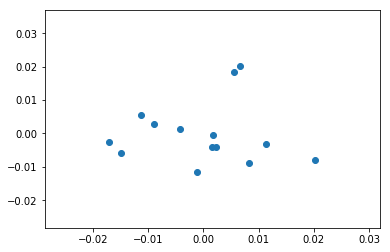

In [87]:
plt.scatter(result[:,0],result[:,1])
plt.show()

In [89]:
words = list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [91]:
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.layers.embeddings import Embedding

In [92]:
#define problem
vocab_size = 200
max_length = 32 #output dim


In [93]:
model = Sequential()
model.add(Embedding(vocab_size,8,input_length=max_length))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))


In [94]:
from keras.optimizers import Adam
adam = Adam()

In [95]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['acc'])

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 8)             1600      
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [97]:
#1600 = vocan_size*neurons = 200*8
# 32*8 = 256
# 256+1 = 257
a = model.get_weights()
len(a)


3

In [98]:
for i in range(len(a)):
    print(len(a[i]))

200
256
1
